In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 读取数据并抽样
data = pd.read_excel("D:\桌面\Train.xlsx").sample(frac=0.1, random_state=0)

# 数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = data.iloc[:, :-1]
X_scaled = scaler.fit_transform(X)
y = data.iloc[:, -1]

# PCA特征提取
pca = PCA(n_components=10)
X_new = pca.fit_transform(X_scaled)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred = abs(lr_model.predict(X_test))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

MAE: 2184.8231
RMSE: 6611.5646
MAPE: 54.2875%


In [5]:
# 特征选择
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X_scaled, y)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred = abs(lr_model.predict(X_test))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

MAE: 2184.6517
RMSE: 6598.8927
MAPE: 55.2440%


In [13]:
# 特征选择
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X_scaled, y)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

MAE: 2184.6517
RMSE: 6598.8927
MAPE: 55.2440%


In [9]:
# PCA特征提取
pca = PCA(n_components=10)
X_new = pca.fit_transform(X_scaled)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    y_pred = np.where(y_pred < 0, 0, y_pred)
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

MAE: 2184.9089
RMSE: 6611.5792
MAPE: 54.2943%


In [10]:
# PCA特征提取
pca = PCA(n_components=10)
X_new = pca.fit_transform(X_scaled)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred = abs(lr_model.predict(X_test))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

MAE: 2184.6517
RMSE: 6611.5269
MAPE: 54.2807%


In [11]:
# PCA特征提取
from sklearn.svm import SVR
pca = PCA(n_components=10)
X_new = pca.fit_transform(X_scaled)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    svr_model = SVR()
    svr_model.fit(X_train, y_train)
    y_pred = svr_model.predict(X_test)
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

MAE: 2157.4428
RMSE: 6538.1839
MAPE: 63.8193%


In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, chi2

# 读取数据并抽样
data = pd.read_excel("D:\桌面\Train.xlsx").sample(frac=0.1, random_state=0)

# 数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = data.iloc[:, :-1]
X_scaled = scaler.fit_transform(X)
y = data.iloc[:, -1]

# PCA特征提取和卡方检验特征选择
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
X_pca = scaler.fit_transform(X_pca)
skb = SelectKBest(chi2, k=5)
X_new = skb.fit_transform(X_pca, y)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred = abs(lr_model.predict(X_test))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

MAE: 2202.1374
RMSE: 6627.2651
MAPE: 53.5977%


In [17]:
# PCA特征提取和卡方检验特征选择
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_scaled)
X_pca = scaler.fit_transform(X_pca)
skb = SelectKBest(chi2, k=5)
X_new = skb.fit_transform(X_pca, y)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred = abs(lr_model.predict(X_test))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))

print('MAPE: %.4f%%' % np.mean(mape_list))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MAE: 2202.1660
RMSE: 6627.2646
MAPE: 53.6016%


In [1]:
#检验下格代码在整体表现如何，为何结果为57%？
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, chi2

# 读取数据并抽样
data = pd.read_excel("D:\桌面\Train.xlsx").sample(frac=1, random_state=0)

# 数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = data.iloc[:, :-1]
X_scaled = scaler.fit_transform(X)
y = data.iloc[:, -1]

# 卡方检验特征选择和PCA特征提取
skb = SelectKBest(chi2, k=15)
X_new = skb.fit_transform(X_scaled, y)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_new)
X_pca = scaler.fit_transform(X_pca)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model = LogisticRegression(max_iter = 200)
    lr_model.fit(X_train, y_train)
    y_pred = abs(lr_model.predict(X_test))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


KeyboardInterrupt: 

In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, chi2

# 读取数据并抽样
data = pd.read_excel("D:\桌面\Train.xlsx").sample(frac=0.1, random_state=0)

# 数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = data.iloc[:, :-1]
X_scaled = scaler.fit_transform(X)
y = data.iloc[:, -1]

# 卡方检验特征选择和PCA特征提取
skb = SelectKBest(chi2, k=15)
X_new = skb.fit_transform(X_scaled, y)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_new)
X_pca = scaler.fit_transform(X_pca)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model = LogisticRegression(max_iter = 200)
    lr_model.fit(X_train, y_train)
    y_pred = abs(lr_model.predict(X_test))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

MAE: 2213.3374
RMSE: 6639.8689
MAPE: 52.6325%


In [17]:
test = pd.read_csv('D:\桌面\Test.csv')

In [18]:
X_test = test.iloc[:, :-1]
X_test_scaled = scaler.fit_transform(X_test)

X_test_new = skb.transform(X_test_scaled)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_test_new)
X_pca = scaler.fit_transform(X_pca)

y_perd = lr_model.predict(X_pca)

In [19]:
np.unique(y_pred)

array([1100, 1200], dtype=int64)

In [22]:
test.shape

(3000, 59)

In [24]:
test[' shares'] = y_perd

In [26]:
test.to_csv('D:\桌面\作业一.csv')

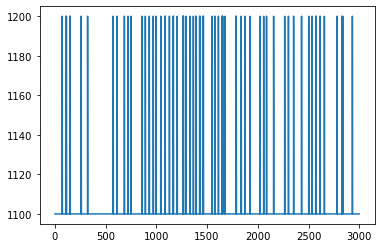

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(1, 3001), y_perd)
plt.show()

In [6]:
test.shape

(3000, 59)

In [4]:
# 卡方检验特征选择和PCA特征提取
skb = SelectKBest(chi2, k=15)
X_new = skb.fit_transform(X_scaled, y)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_new)
X_pca = scaler.fit_transform(X_pca)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred = abs(lr_model.predict(X_test))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

MAE: 2184.5660
RMSE: 6611.8694
MAPE: 53.7483%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, chi2

# 读取数据并抽样
data = pd.read_excel("D:\桌面\Train.xlsx")

# 数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = data.iloc[:, :-1]
X_scaled = scaler.fit_transform(X)
y = data.iloc[:, -1]

# 卡方检验特征选择和PCA特征提取
skb = SelectKBest(chi2, k=10)
X_new = skb.fit_transform(X_scaled, y)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_new)
X_pca = scaler.fit_transform(X_pca)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred = abs(lr_model.predict(X_test))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

In [7]:
print(max(y_pred))
print(min(y_pred))

1400
1100
